### Ridge Regression
- also known as **"L2 Regularization"**
- used to Reduce Overfitting (when train data accuracy is very high but test data is very poor)
- **How it is reducing ovrefitting, because it is reducing the impact by reducing the value of coefficient of the feature that are not directly correlated with the output feature**
- in order to reduce the overfitting in the linear regression, we use Ridge regression algorithm

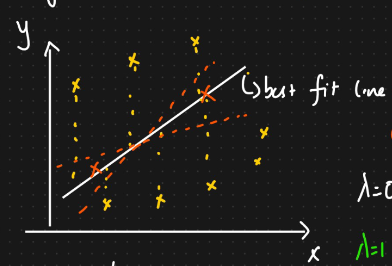
- a new algorithm which actually help us to hyperparameter tune the linear regression
- overfitting means our cost function is becoming zero, so to avoid the overfitting we will make sure that cost function will never become zero by adding hyperparameter(λ) and summation of slope squares (coefficient square)

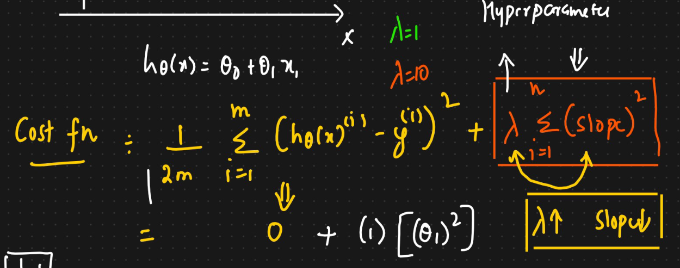

### IMP: Relationship between λ and slope square
- **when λ is increasing, slope is decreasing**
- remember slope or coefficient value will never become zero, as we keep on increasing the λ
- when λ=0, then liner regression is getting applied and not ridge regression and additional ridge part become zero
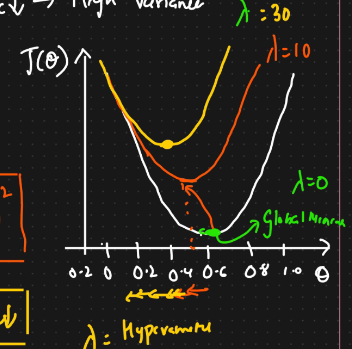

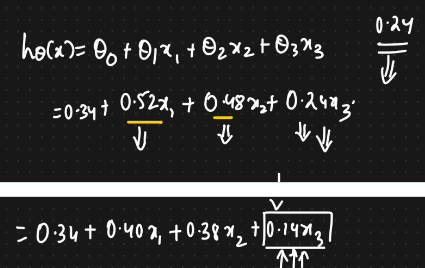

### Lasso Regression 
- also known as **"L1 Regularization"**
- it is used for **"feature selection"**
- features selection means feature that are not very important will get automatically deleted and features which are important stays
- here in cost function will add λ and summation of magnitude of slopes or coefficient
- in lasso regression, as we keep on increasing λ value, slope will decrease and after some point the not important feature slope becomes 0
- so when we are having more number of features and we want to select only the important feature, we can use lasso regression

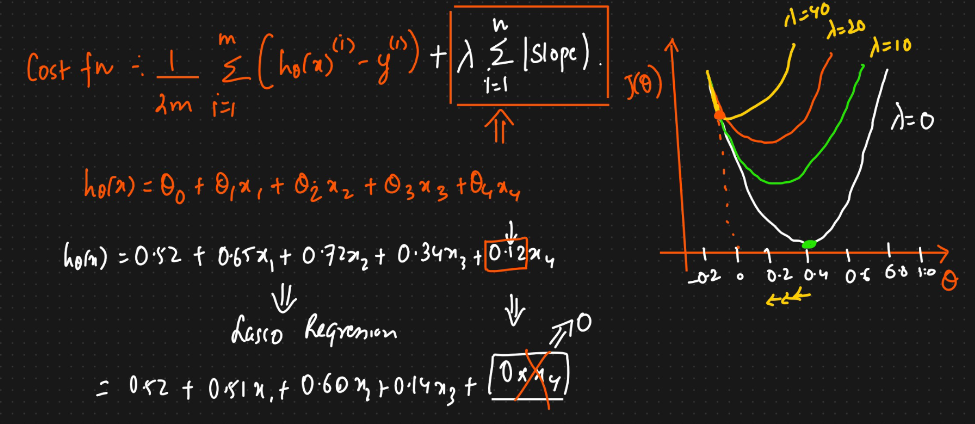

### ElasticNet Regression
- combination of both Ridge and Lasso Regression
- so here we reduce overfitting and do feature selection

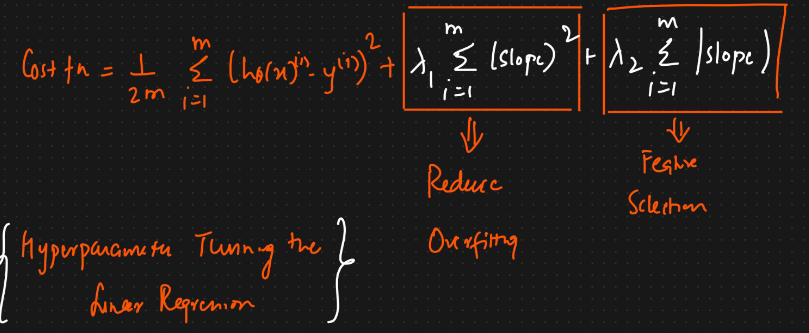

NOTE: **all these ridge, lasso and elasticnet for doing hyperparameter tuning the linear regression**

## Types of Cross Validation
- as we know, will split our dataset in train and test dataset and then again the train dataset, we split in train and validation dataset
- so for splitting train dataset in train and validation dataset, will use cross validation techniques
- there is one important thing i.e. **"random_state"** so as we change the value of random state will get different train and validation dataset 
    - **Leave One Out Cross Validation (LOOCV)**
    - **Leave P Out Cross Validation (LPOCV)**

### Leave One Out Cross Validation
- so in this, whatever total number of records in training dataset will be having, will do that experiment and find out the accuracy of model that number of times 
- in each experiment, will take one by one, only one record as validation dataset and rest become training dataset for that experiment or iteration
- Disadvantages:
    - as dataset increases, complexity of training model increases and also number of experiment or iteration also increases
    - major is overfitting, as our validation data size is very low (only one at each experiment) and training dataset is larger which will have high accuarcy so when will test with new test dataset, accuracy will go down resulting in overfitting

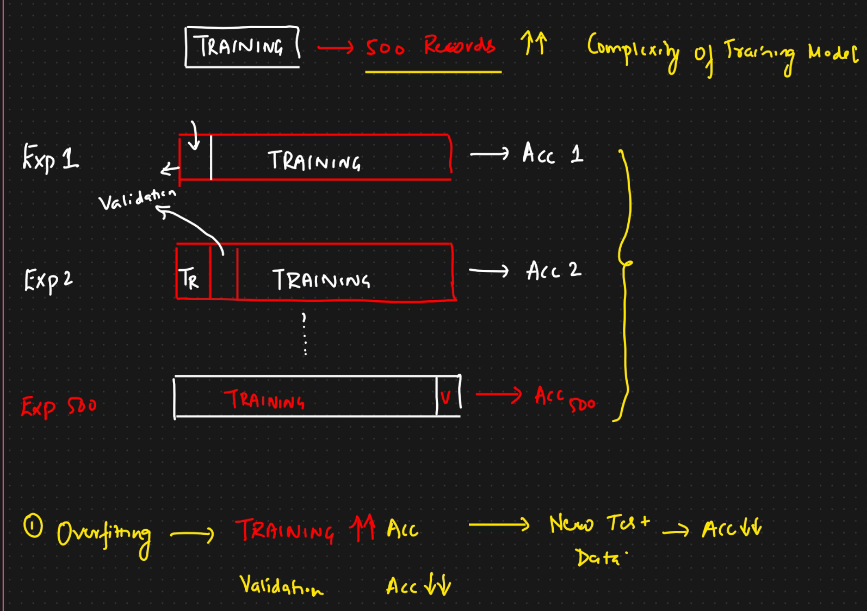

### Leave P Out Cross Validation
- in this, every thing is same as Leave One Out Cross Validation
- only difference here is instead of one out, here we can assign P any value like p=10, p=20 or whatever and split the training and validation dataset